In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalMaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [36]:
# Create an ImageDataGenerator for augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Loading the dataset from the folders
train_data = train_datagen.flow_from_directory('data/Train',  
                                               target_size=(128, 128),  # resize images
                                               batch_size=64,
                                               class_mode='categorical')  # Multiclass classification

test_data = test_datagen.flow_from_directory('data/Test',  
                                             target_size=(128, 128),
                                             batch_size=64,
                                             class_mode='categorical')

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [37]:
# Define the CNN model for multiclass classification
# Define the CNN model for multiclass classification
model = Sequential()

# Input Layer
model.add(Input(shape=(128, 128, 3)))

# First Convolutional Layer with Batch Normalization and MaxPooling
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())  # Adding Batch Normalization
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer with Batch Normalization and MaxPooling
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())  # Adding Batch Normalization
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer with Batch Normalization and MaxPooling
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())  # Adding Batch Normalization
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block (Additional Layer)
model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening Layer (Convert 3D features into 1D feature vector)
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output Layer for multiclass classification
model.add(Dense(9, activation='softmax'))  # 9 classes

# Define a custom learning rate for the Adam optimizer
learning_rate = 0.0001  # You can adjust this value

# Compile the model for multiclass classification
optimizer = Adam(learning_rate=learning_rate)  # Adam optimizer with custom learning rate

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',  # For multiclass classification
              metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,785,481 (10.63 MB)

 Trainable params: 2,783,753 (10.62 MB)

 Non-trainable params: 1,728 (6.75 KB)

In [38]:
# Train the model
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True, mode='max')
model_checkpoint = ModelCheckpoint('best_skin_cancer_model.keras',  # Changed to .keras
                                   save_best_only=True,
                                   monitor='val_accuracy',
                                   mode='max')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)


history = model.fit(
    train_data,
    epochs=100,  # Adjust as needed
    validation_data=test_data,
    callbacks=[early_stopping, model_checkpoint, lr_scheduler],
)


Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.2697 - loss: 3.3961 - val_accuracy: 0.1356 - val_loss: 3.2204 - learning_rate: 1.0000e-04
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.4353 - loss: 2.7453 - val_accuracy: 0.1356 - val_loss: 3.4588 - learning_rate: 1.0000e-04
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.4313 - loss: 2.7224 - val_accuracy: 0.1356 - val_loss: 3.6498 - learning_rate: 1.0000e-04
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.4318 - loss: 2.6749 - val_accuracy: 0.1356 - val_loss: 3.9646 - learning_rate: 1.0000e-04
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.4574 - loss: 2.5475 - val_accuracy: 0.1356 - val_loss: 4.1755 - learning_rate: 1.0000e-04
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4703 - loss: 2.5197
Epoch 6: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
35/35 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.4708 - 

In [39]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.4514 - loss: 3.0092
Test Loss: 2.9108080863952637
Test Accuracy: 0.4661017060279846


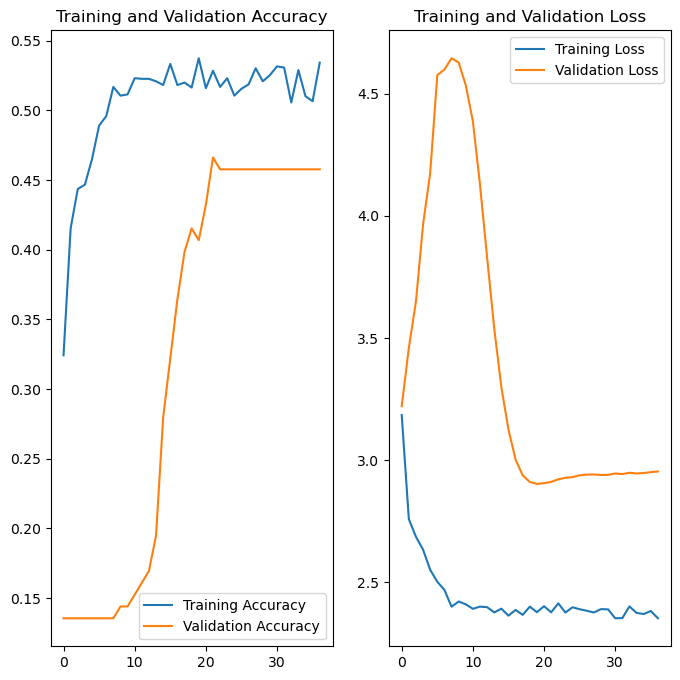

In [40]:
import matplotlib.pyplot as plt

# Get the history of training and validation accuracy/loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plot training and validation accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:

from tensorflow.keras.preprocessing import image

# Load a single image from the test set
img_path = 'data/Test/basal cell carcinoma/ISIC_0024436.jpg'  # Provide path to the image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize the image

# Make prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
Predicted class: [1]


In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict classes for the test dataset
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels from the test dataset
true_labels = test_data.classes

# Confusion matrix
print('Confusion Matrix')
cm = confusion_matrix(true_labels, y_pred)
print(cm)

# Classification report
print('Classification Report')
target_names = list(test_data.class_indices.keys())  # Get the class names
print(classification_report(true_labels, y_pred, target_names=target_names))

1/2 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/stepWARNING:tensorflow:6 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000283F363F420> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step
Confusion Matrix
[[1 1 0 1 4 8 0 1 0]
 [1 1 0 1 9 4 0 0 0]
 [2 4 1 1 3 3 0 0 2]
 [3 6 0 2 2 2 0 1 0]
 [1 0 2 2 6 4 0 0 1]
 [2 3 0 2 3 6 0 0 0]
 [0 0 0 0 1 0 0 2 0]
 [2 2 0 1 3 2 0 5 1]
 [0 2 0 0 0 0 0 1 

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
